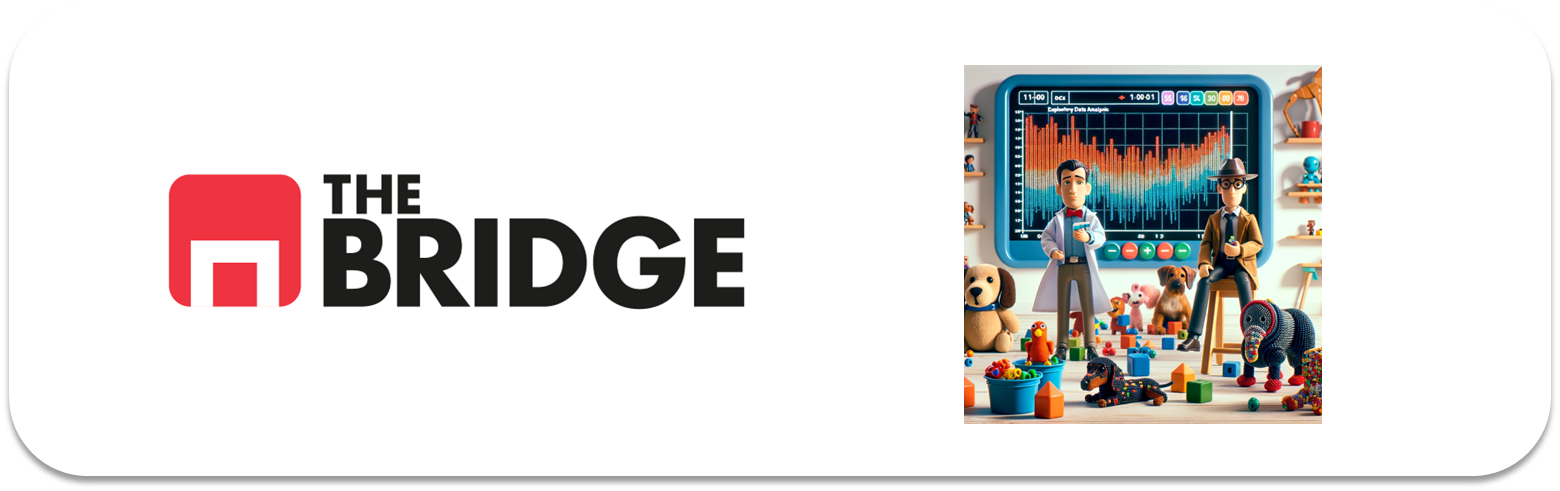

## PRACTICA OBLIGATORIA: ANÁLISIS MULTIVARIANTE

* La práctica obligatoria de esta unidad consiste en completar el análisis del dataset del Titanic, dirigido por una serie de preguntas, y de terminar de analizar algunos aspectos del dataset de viajes. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0


Importa los paquetes y módulos que necesites a lo largo del notebook

In [66]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.stats import chi2_contingency

from bootcampviztools import plot_categorical_relationship_fin, pinta_distribucion_categoricas, \
    plot_categorical_numerical_relationship, plot_combined_graphs,\
        plot_grouped_boxplots, plot_grouped_histograms,grafico_dispersion_con_correlacion,bubble_plot, plot_multiple_boxplots
# Este módulo lo tienes en el directorio de los notebooks, puede abrirlo y jugar con las funciones que contiene


ImportError: cannot import name 'plot_multiple_boxplots' from 'bootcampviztools' (c:\Users\maria\Documents\03_DS\ONLINE_DS_THEBRIDGE_MRN\03_Analisis_de_Datos_exercises\Sprint_07\Unidad_02\Practica_Obligatoria\bootcampviztools.py)

## #1 TITANIC

### #1.1

Carga en un dataframe el dataset del titanic, que está en la ruta "./data/titanic.csv".

In [3]:
df_titanic = pd.read_csv("./data/titanic.csv")
df_titanic.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### #1.2

Deshazte de las columnas "deck", "survived", "pclass" y "embarked" porque no las emplearemos, la primera por su cantidad de nulos y el resto porque son variantes de otras que ya existen y cuyos valores resultan más expresivos a la hora de hacer un análisis. 

In [4]:
df_titanic.drop(columns=["deck","survived","pclass","embarked"],inplace=True)
df_titanic

,sex,age,sibsp,parch,fare,class,who,adult_male,embark_town,alive,alone
0,male,22.0,1,0,7.2500,Third,man,True,Southampton,no,False
1,female,38.0,1,0,71.2833,First,woman,False,Cherbourg,yes,False
2,female,26.0,0,0,7.9250,Third,woman,False,Southampton,yes,True
3,female,35.0,1,0,53.1000,First,woman,False,Southampton,yes,False
4,male,35.0,0,0,8.0500,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...
886,male,27.0,0,0,13.0000,Second,man,True,Southampton,no,True
887,female,19.0,0,0,30.0000,First,woman,False,Southampton,yes,True
888,female,NaN,1,2,23.4500,Third,woman,False,Southampton,no,False
889,male,26.0,0,0,30.0000,First,man,True,Cherbourg,yes,True


### #1.3

Suma las columnas "parch" y "sibsp" para tener el número de parientes de cada pasajero, guarda el resultado en otra columna "family_members", luego deshazte de "parch" y "sibsp"

In [5]:
df_titanic["family_members"] = df_titanic.parch + df_titanic.sibsp
df_titanic

,sex,age,sibsp,parch,fare,class,who,adult_male,embark_town,alive,alone,family_members
0,male,22.0,1,0,7.2500,Third,man,True,Southampton,no,False,1
1,female,38.0,1,0,71.2833,First,woman,False,Cherbourg,yes,False,1
2,female,26.0,0,0,7.9250,Third,woman,False,Southampton,yes,True,0
3,female,35.0,1,0,53.1000,First,woman,False,Southampton,yes,False,1
4,male,35.0,0,0,8.0500,Third,man,True,Southampton,no,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,male,27.0,0,0,13.0000,Second,man,True,Southampton,no,True,0
887,female,19.0,0,0,30.0000,First,woman,False,Southampton,yes,True,0
888,female,NaN,1,2,23.4500,Third,woman,False,Southampton,no,False,3
889,male,26.0,0,0,30.0000,First,man,True,Cherbourg,yes,True,0


### #1.4

Imputa la moda a los valores nulos de "embark_town"

In [6]:
# Identificar los valores nulos en "embark_town"
embark_town_nan = df_titanic["embark_town"].isna()

# Imputar la moda en los valores nulos
df_titanic.loc[embark_town_nan,"embark_town"] = df_titanic["embark_town"].mode()[0]

### #1.5

Imputa la media a los valores faltantes de "age", si quieres puedes hacer algo más preciso (por ejemplo considerando además la columna "who")

In [7]:
# relleno NaN en age con el promedio por edad y clase

# calculos los valores promedios de edad agrupados
age_grouped_means = df_titanic.groupby(["who"])["age"].transform("mean")
age_grouped_means


0      33.173123
1      32.000000
2      32.000000
3      32.000000
4      33.173123
         ...    
886    33.173123
887    32.000000
888    32.000000
889    33.173123
890    33.173123
Name: age, Length: 891, dtype: float64

In [8]:
# relleno los NaN
df_titanic["age"] = df_titanic["age"].fillna(age_grouped_means)

In [9]:
df_titanic.age.value_counts(normalize=True)

age
33.173123    0.139169
32.000000    0.079686
24.000000    0.033670
22.000000    0.030303
18.000000    0.029181
               ...   
36.500000    0.001122
55.500000    0.001122
0.920000     0.001122
23.500000    0.001122
74.000000    0.001122
Name: proportion, Length: 89, dtype: float64

### 1.6

Realiza los análisis bivariantes o multivariantes que necesites, así como los test de hipótesis necesarios para contestar a las siguientes preguntas. Nota: utiliza la variable "alive" para saber si un pasajero sobrevivió o no:

1. En términos absolutos, ¿sobrevivieron más hombres, mujeres o niños? ¿Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre el sexo y la supervivencia en el Titanic?¿Y entre ser adulto o ser niño?


In [10]:
df_titanic.head(5)

,sex,age,sibsp,parch,fare,class,who,adult_male,embark_town,alive,alone,family_members
0,male,22.0,1,0,7.2500,Third,man,True,Southampton,no,False,1
1,female,38.0,1,0,71.2833,First,woman,False,Cherbourg,yes,False,1
2,female,26.0,0,0,7.9250,Third,woman,False,Southampton,yes,True,0
3,female,35.0,1,0,53.1000,First,woman,False,Southampton,yes,False,1
4,male,35.0,0,0,8.0500,Third,man,True,Southampton,no,True,0


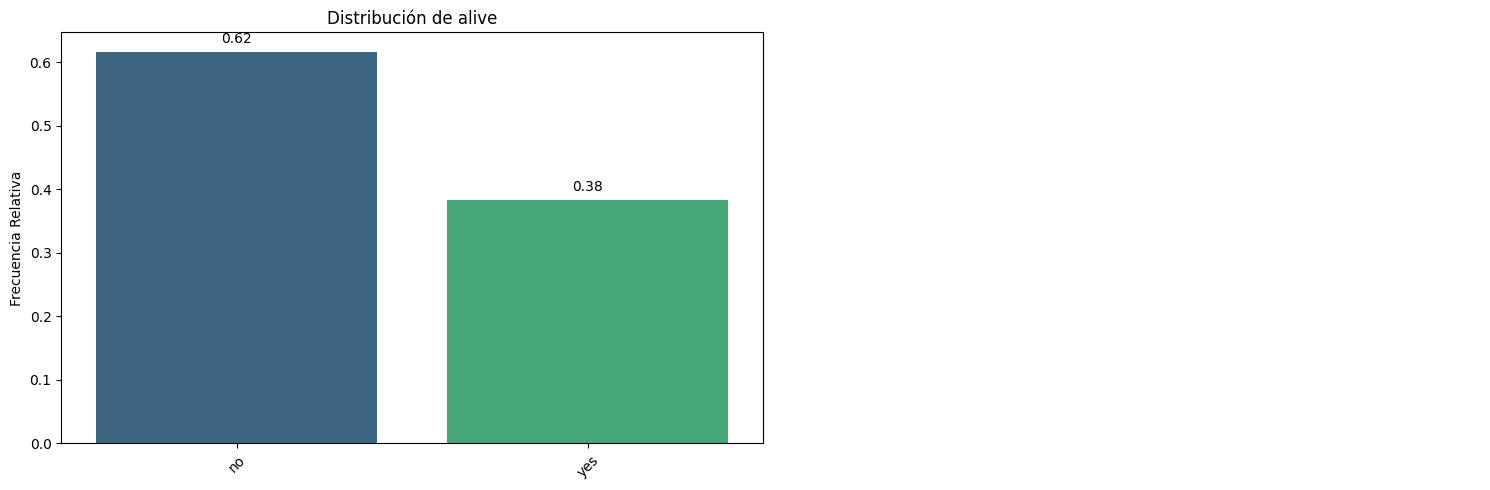

In [11]:
# Variable directora = categórica "alive" que determina si un pasajero sobrevivió o no
pinta_distribucion_categoricas(df_titanic,["alive"], relativa= True, mostrar_valores= True)


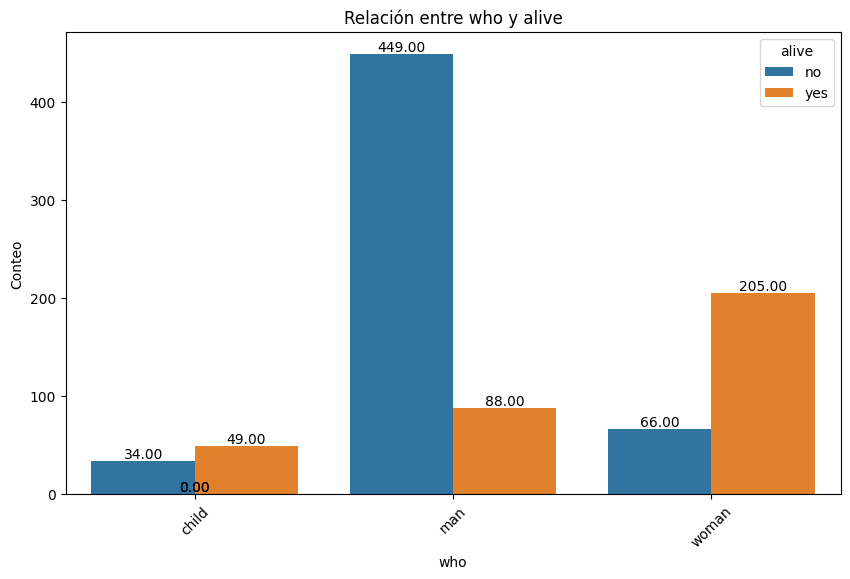

In [12]:
# Relación con la categórica "who" que identifica si el pasajero era hombre, mujer o niño. En términos absolutos
plot_categorical_relationship_fin(df_titanic, "who","alive", show_values = True)

# Entérminos absolutos sobrevivieron más mujeres que hombres y niños

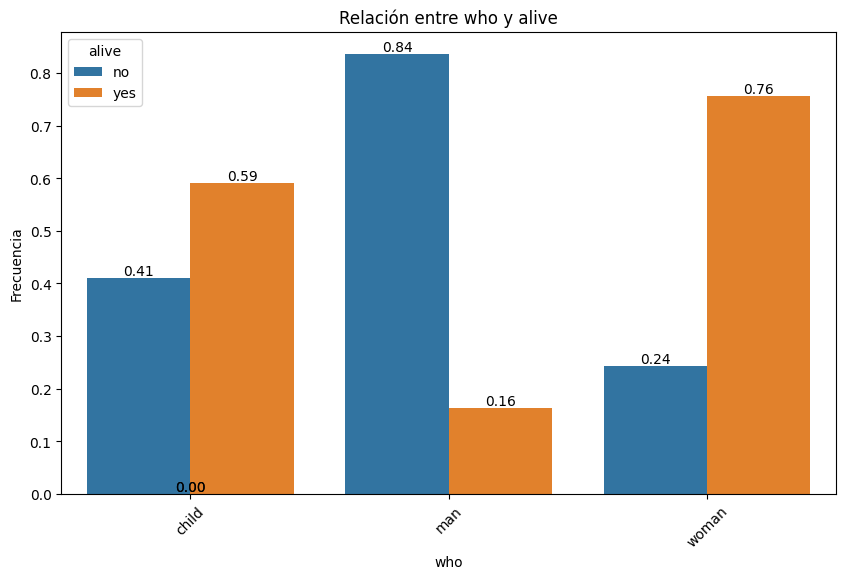

In [13]:
# Relación con la categórica "who" que identifica si el pasajero era hombre, mujer o niño. En términos relativos
plot_categorical_relationship_fin(df_titanic, "who","alive", relative_freq=True, show_values = True)

# En términos relativos sobrevivieron mayor porcentaje de mujeres y niños que hombres

In [14]:
# TEST CHI CUADRADO --> Analizar relaciones (estadísticamente significativas) entre variables categóricas
tabla_contingencia = pd.crosstab(df_titanic['alive'], df_titanic['sex'])
chi2, p, dof, expected = chi2_contingency(tabla_contingencia)
# H0 = No hay relación entre género y supervivencia

# Resultado
print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

# p<0.05 --> se rechaza H0, por tanto si hay relación, estadísticamente significativa, entre genero y aliver

Valor Chi-Cuadrado: 260.71702016732104
P-Value: 1.1973570627755645e-58
Grados de Libertad: 1
Tabla de Frecuencias Esperadas:
 [[193.47474747 355.52525253]
 [120.52525253 221.47474747]]


In [15]:
# TEST CHI CUADRADO --> Analizar relaciones (estadísticamente significativas) entre variables categóricas
tabla_contingencia = pd.crosstab(df_titanic['alive'], df_titanic['who'])
chi2, p, dof, expected = chi2_contingency(tabla_contingencia)
# H0 = No hay relación entre género y supervivencia

# Resultado
print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

# p<0.05 --> se rechaza H0, por tanto si hay relación, estadísticamente significativa, entre who y alive

Valor Chi-Cuadrado: 283.923050324233
P-Value: 2.2227620817798914e-62
Grados de Libertad: 2
Tabla de Frecuencias Esperadas:
 [[ 51.14141414 330.87878788 166.97979798]
 [ 31.85858586 206.12121212 104.02020202]]



2. En términos absolutos, ¿de que clase sobrevivieron más pasajeros?¿ Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre la clase en la que se viajaba y la supervivencia?



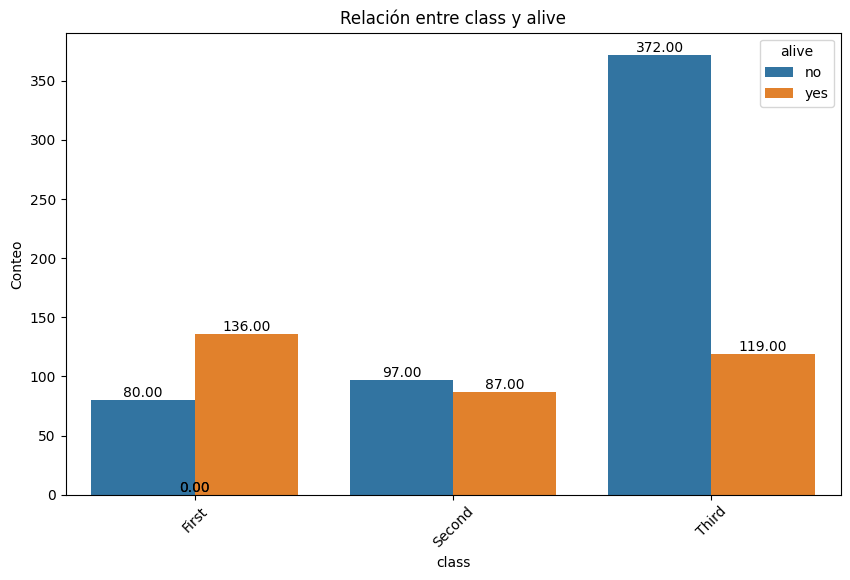

In [16]:
# Relación con la categórica "class" que identifica si la clase en la que viajaba el pasajero. En términos absolutos
plot_categorical_relationship_fin(df_titanic, "class","alive", show_values = True)

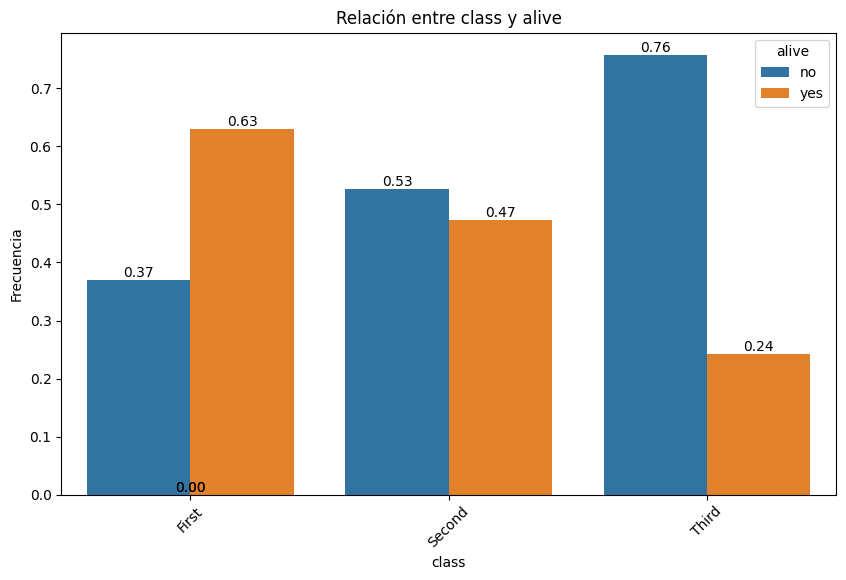

In [17]:
# Relación con la categórica "class" que identifica si la clase en la que viajaba el pasajero. En términos absolutos
plot_categorical_relationship_fin(df_titanic, "class","alive", relative_freq=True, show_values = True)

In [18]:
# TEST CHI CUADRADO --> Analizar relaciones (estadísticamente significativas) entre variables categóricas
tabla_contingencia = pd.crosstab(df_titanic['alive'], df_titanic['class'])
chi2, p, dof, expected = chi2_contingency(tabla_contingencia)
# H0 = No hay relación entre género y supervivencia

# Resultado
print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

# p<0.05 --> se rechaza H0, por tanto si hay relación, estadísticamente significativa, entre class y alive

Valor Chi-Cuadrado: 102.88898875696056
P-Value: 4.549251711298793e-23
Grados de Libertad: 2
Tabla de Frecuencias Esperadas:
 [[133.09090909 113.37373737 302.53535354]
 [ 82.90909091  70.62626263 188.46464646]]


3. ¿De qué ciudad sobrevivieron más personas?¿Y porcentualmente de que ciudad sobrevivieron más personas? ¿Hay alguna relación estadística significativa entre haber embarcado en una de las tres ciudades y haber sobrevivido o fallecido?



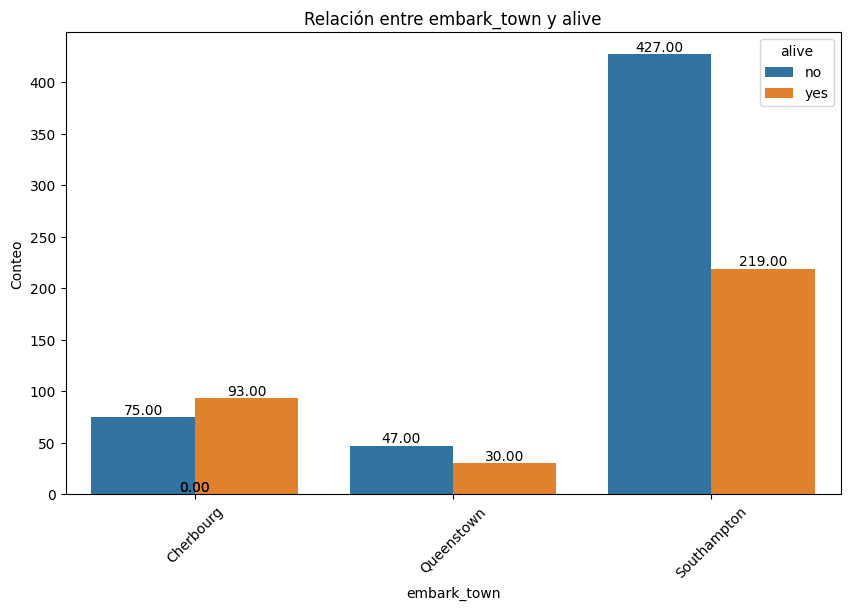

In [19]:
# Relación con la categórica "embark_town" que identifica la ciudad. En términos absolutos
plot_categorical_relationship_fin(df_titanic, "embark_town","alive", show_values = True)

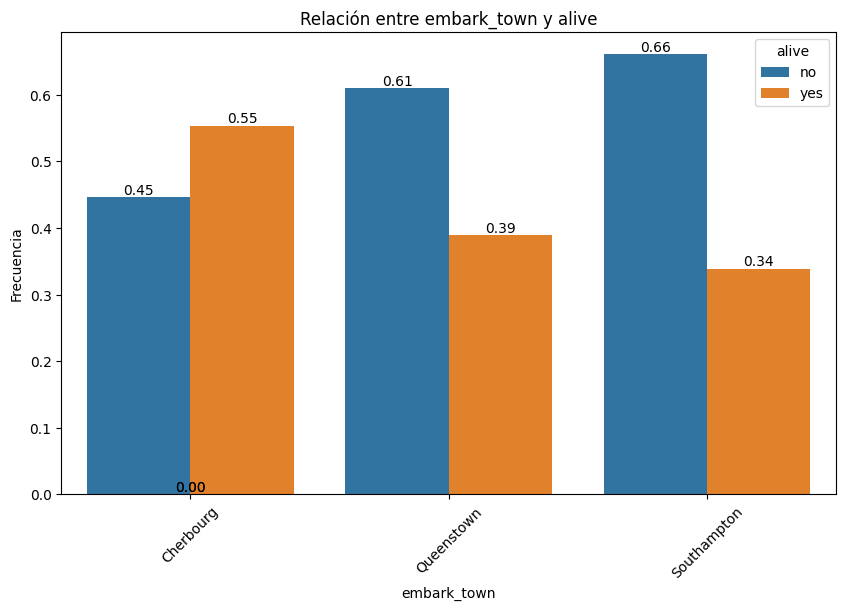

In [20]:
# Relación con la categórica "embark_town" que identifica la ciudad. En términos absolutos
plot_categorical_relationship_fin(df_titanic, "embark_town","alive", relative_freq=True, show_values = True)

In [21]:
# TEST CHI CUADRADO --> Analizar relaciones (estadísticamente significativas) entre variables categóricas
tabla_contingencia = pd.crosstab(df_titanic['embark_town'], df_titanic['class'])
chi2, p, dof, expected = chi2_contingency(tabla_contingencia)
# H0 = No hay relación entre género y supervivencia

# Resultado
print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

# p<0.05 --> se rechaza H0, por tanto si hay relación, estadísticamente significativa, entre class y alive

Valor Chi-Cuadrado: 122.64116372971472
P-Value: 1.4569383279917686e-25
Grados de Libertad: 4
Tabla de Frecuencias Esperadas:
 [[ 40.72727273  34.69360269  92.57912458]
 [ 18.66666667  15.90123457  42.43209877]
 [156.60606061 133.40516274 355.98877666]]


4. ¿Qué relación hay entre el precio del pasaje y la supervivencia/fallecimiento?


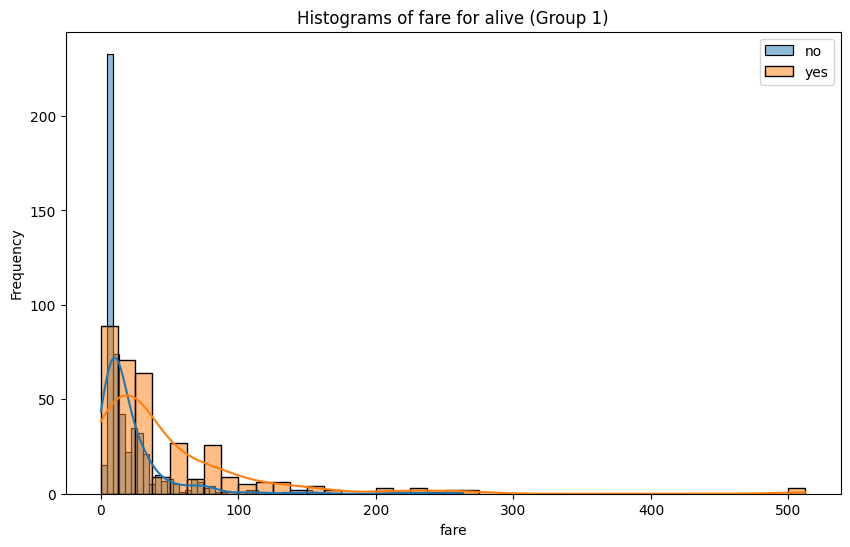

In [22]:
# Relación con la variable cuantitativa "fare"
plot_grouped_histograms(df_titanic,"alive", "fare",2)

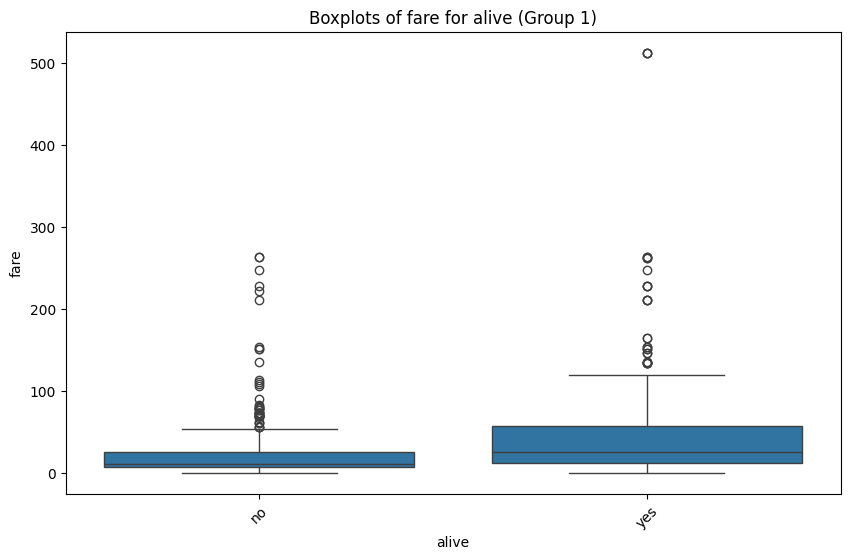

In [23]:
plot_grouped_boxplots(df_titanic,"alive","fare")


5. Existen pasajero que no pagaron el billete, ¿podrías explicar por qué? ¿Qué ocurrió con la persona que más dinero se dejó?


In [24]:
df_titanic["fare"].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: fare, dtype: float64

In [25]:
# Pasajeros que no pagaron
df_titanic.loc[df_titanic["fare"] == 0]

,sex,age,sibsp,parch,fare,class,who,adult_male,embark_town,alive,alone,family_members
179,male,36.000000,0,0,0.0,Third,man,True,Southampton,no,True,0
263,male,40.000000,0,0,0.0,First,man,True,Southampton,no,True,0
271,male,25.000000,0,0,0.0,Third,man,True,Southampton,yes,True,0
277,male,33.173123,0,0,0.0,Second,man,True,Southampton,no,True,0
302,male,19.000000,0,0,0.0,Third,man,True,Southampton,no,True,0
413,male,33.173123,0,0,0.0,Second,man,True,Southampton,no,True,0
466,male,33.173123,0,0,0.0,Second,man,True,Southampton,no,True,0
481,male,33.173123,0,0,0.0,Second,man,True,Southampton,no,True,0
597,male,49.000000,0,0,0.0,Third,man,True,Southampton,no,True,0
633,male,33.173123,0,0,0.0,First,man,True,Southampton,no,True,0


- Los pasajeros que no pagaron eran trabajadores de Titanic

In [26]:
max_fare = df_titanic["fare"].max()
df_titanic.loc[df_titanic["fare"] == df_titanic["fare"].max()]

# Las personas que más pagaron, sobrevivieron

,sex,age,sibsp,parch,fare,class,who,adult_male,embark_town,alive,alone,family_members
258,female,35.0,0,0,512.3292,First,woman,False,Cherbourg,yes,True,0
679,male,36.0,0,1,512.3292,First,man,True,Cherbourg,yes,False,1
737,male,35.0,0,0,512.3292,First,man,True,Cherbourg,yes,True,0



6. Existe alguna relación entre el dinero pagado, la ciudad de embarque y la superviviencia/fallecimiento. No necesitas aplicar ningún test, muestralo numérica o visualmente.


In [30]:
df_titanic["embark_town"].value_counts()

embark_town
Southampton    646
Cherbourg      168
Queenstown      77
Name: count, dtype: int64

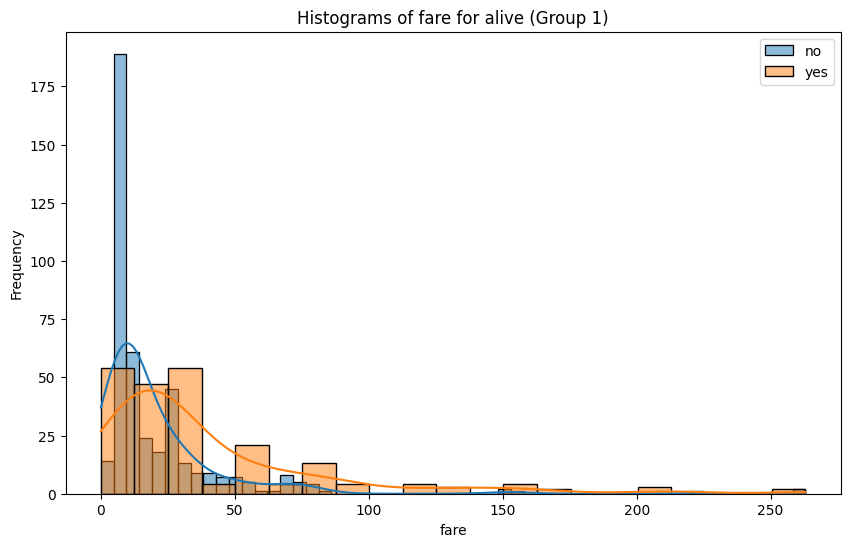

In [31]:
plot_grouped_histograms(df_titanic.loc[df_titanic["embark_town"] == "Southampton"],"alive", "fare",2)

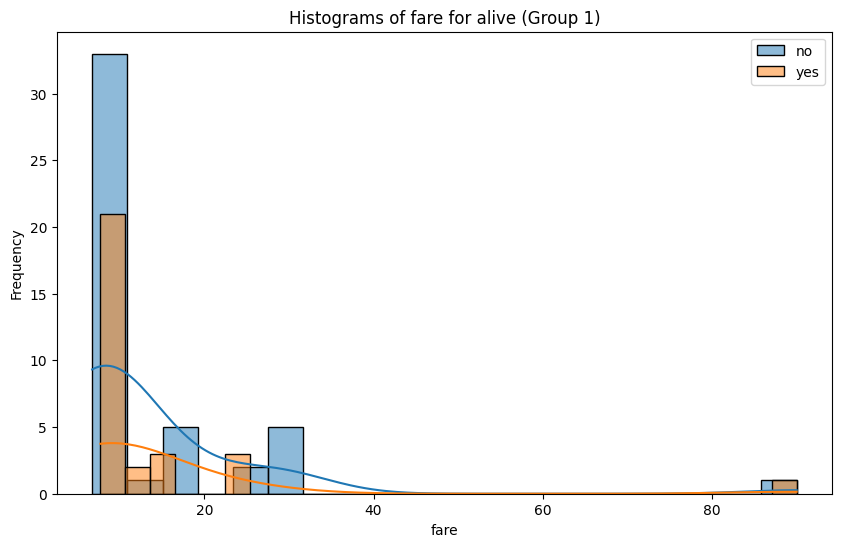

In [32]:
plot_grouped_histograms(df_titanic.loc[df_titanic["embark_town"] == "Queenstown"],"alive", "fare",2)

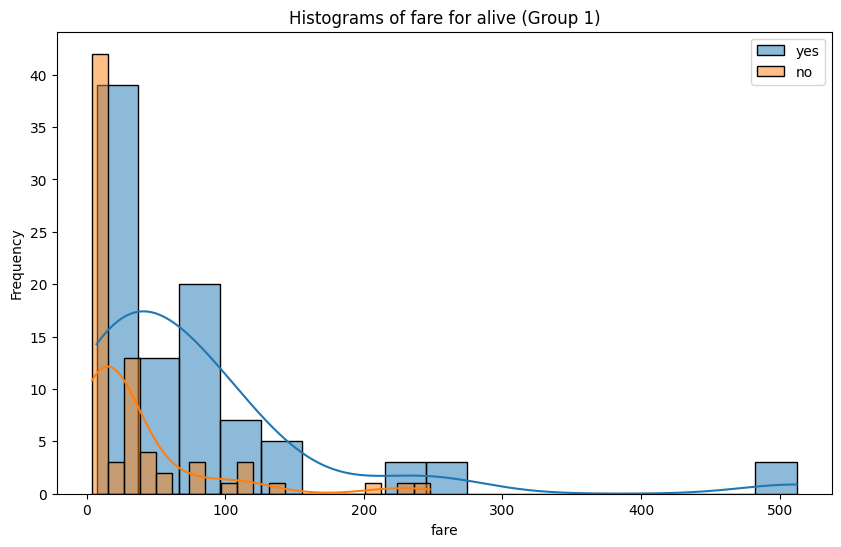

In [29]:
plot_grouped_histograms(df_titanic.loc[df_titanic["embark_town"] == "Cherbourg"],"alive", "fare",2)


7. Ahondando en la relación entre sobrevivir o fallecer, la clase en la que se viajó y la edad de los pasajeros. ¿Qué agrupación de las dos variables (clase y edad) sobrevivió más en términos absolutos y en términos relativos?



In [37]:
col_directora = "alive"
var_1 = "who"
var_2 = "class"

diccionario_multivariante = {}
for valor in df_titanic[col_directora].unique():
    diccionario_multivariante[valor] = df_titanic.loc[df_titanic[col_directora] == valor,[var_1,var_2]] # Ojo al orden quiero ver para cada oferta como es la distribución de educacion

Respuesta no:


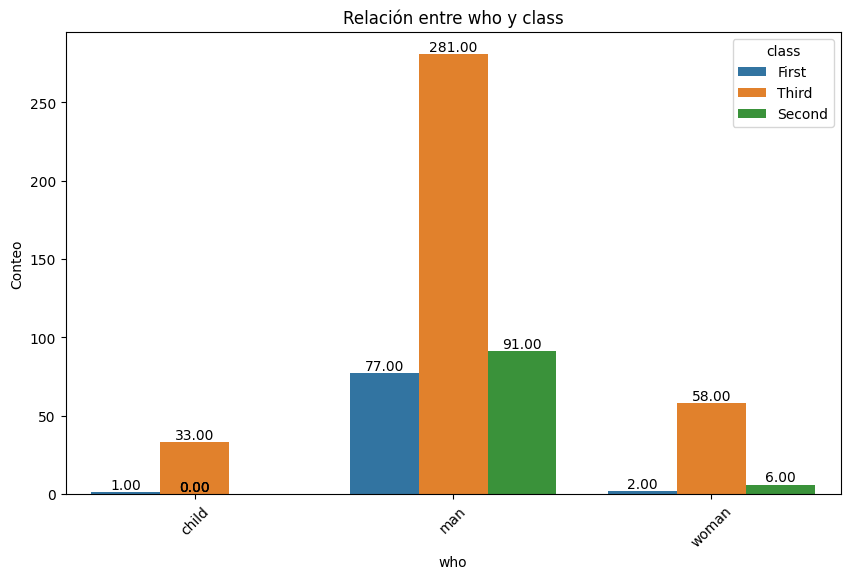

Respuesta yes:


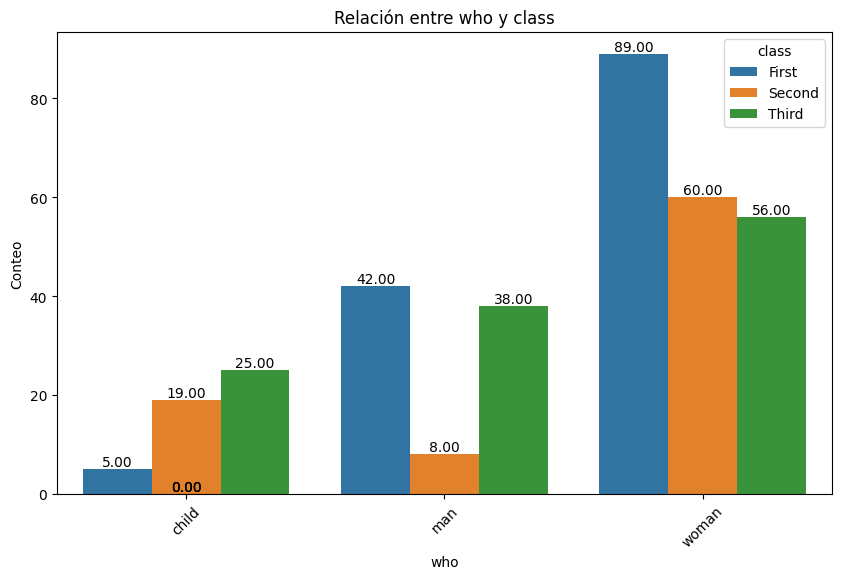

In [39]:
for valor,df_datos in diccionario_multivariante.items():
    print(f"Respuesta {valor}:")
    plot_categorical_relationship_fin(df_datos,var_1,var_2, show_values= True)

Respuesta no:


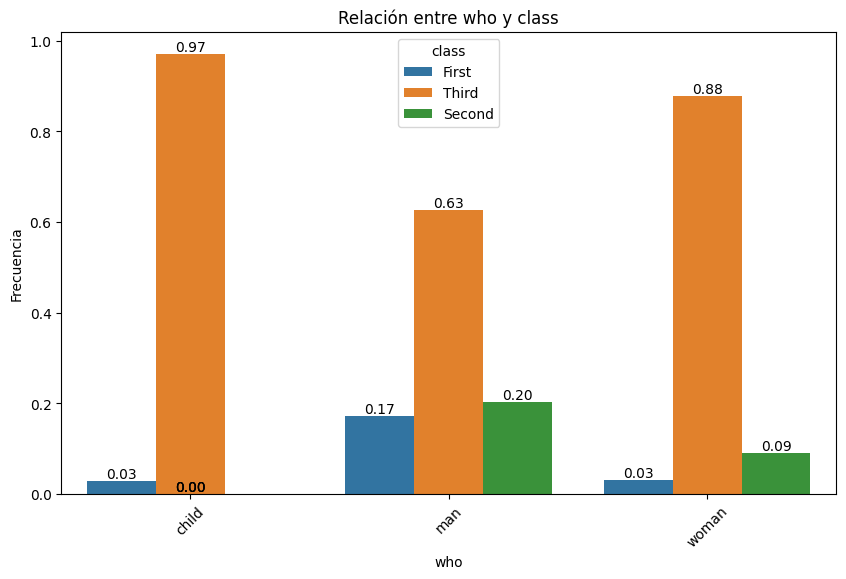

Respuesta yes:


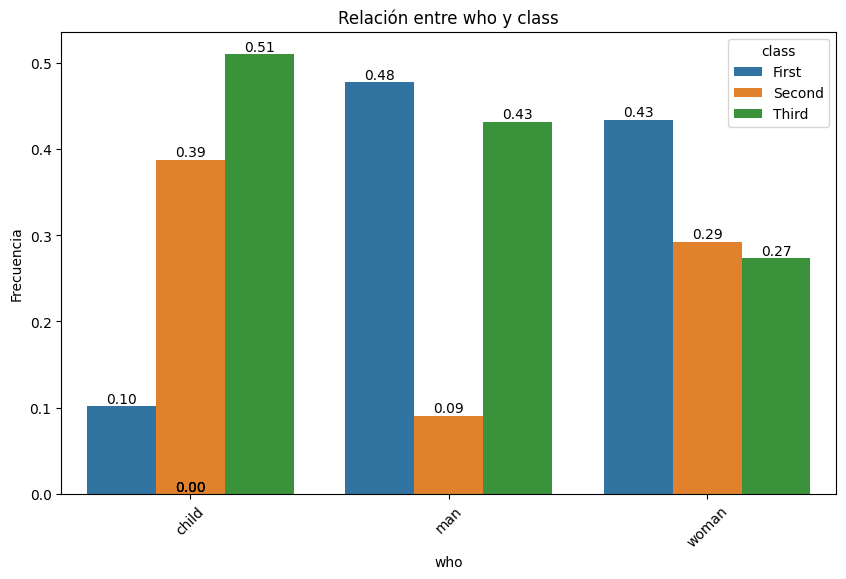

In [38]:
for valor,df_datos in diccionario_multivariante.items():
    print(f"Respuesta {valor}:")
    plot_categorical_relationship_fin(df_datos,var_1,var_2, relative_freq= True, show_values= True)

8. Finalmente, muestra las posibles relaciones entre edad, coste del billete y supervivencia/fallecimiento. ¿Qué puedes decir al respecto?

In [40]:
col_directora = "alive"
var_1 = "age"
var_2 = "fare"
diccionario_multivariante = {}
for valor in df_titanic[col_directora].unique():
    diccionario_multivariante[valor] = df_titanic.loc[df_titanic[col_directora] == valor,[var_1,var_2]] # Ojo al orden quiero ver para cada oferta como es la distribución de educacion

Respuesta no:


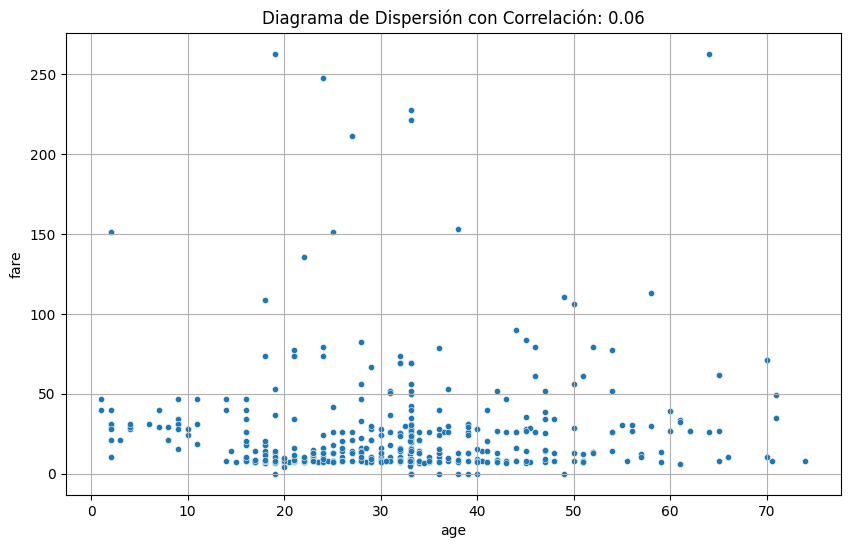

Respuesta yes:


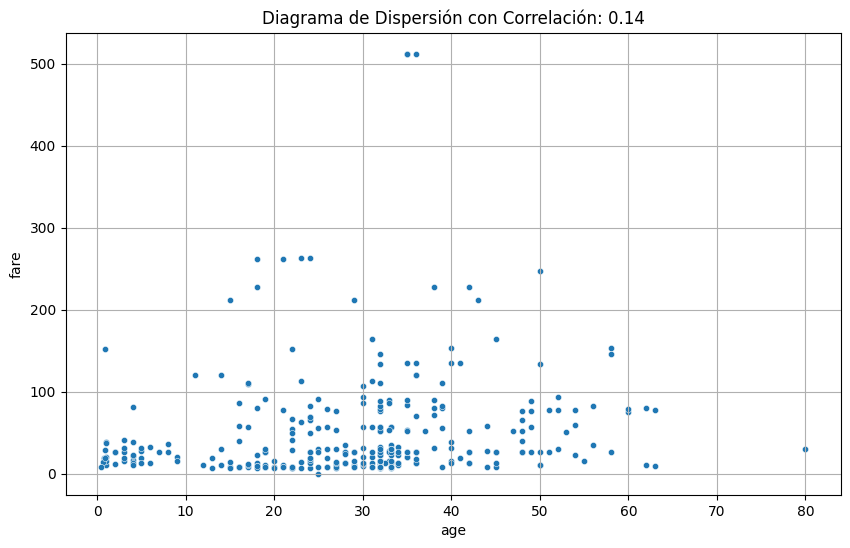

In [41]:
for valor,df_datos in diccionario_multivariante.items():
    print(f"Respuesta {valor}:")
    grafico_dispersion_con_correlacion(df_datos,var_1,var_2, tamano_puntos=20, mostrar_correlacion= True)

## #2 Viajes

El objetivo en este caso no es tanto hacer un montón de análisis sino de completar lo que quedó pendiente en el workout y de entender cómo de un dataset podemos obtener preguntas o hipótesis interesantes (si las hay)

### #2.1 

Carga el dataset de viajes del mes de junio. Repite el análisis bivariante entre las variables "Aircompany" e "Ingresos", mostrando previamente los viajes por compañía aérea. ¿Qué situación llamativa nos surgió? (Ten en cuenta que somos el departamenteo de DataScience de TabarAir)

In [42]:
df_air_jun = pd.read_csv("./data/dataset_viajes_jun23.csv")

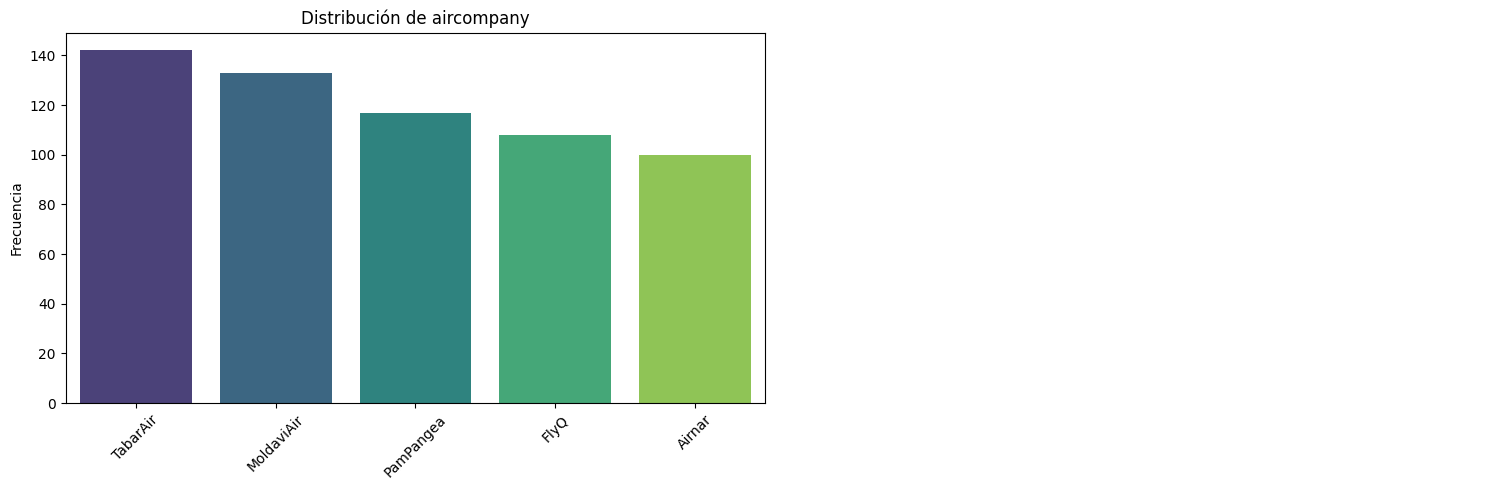

In [ ]:
# número de vuelos por compañía
var = ["aircompany"]
pinta_distribucion_categoricas(df_air_jun,var)

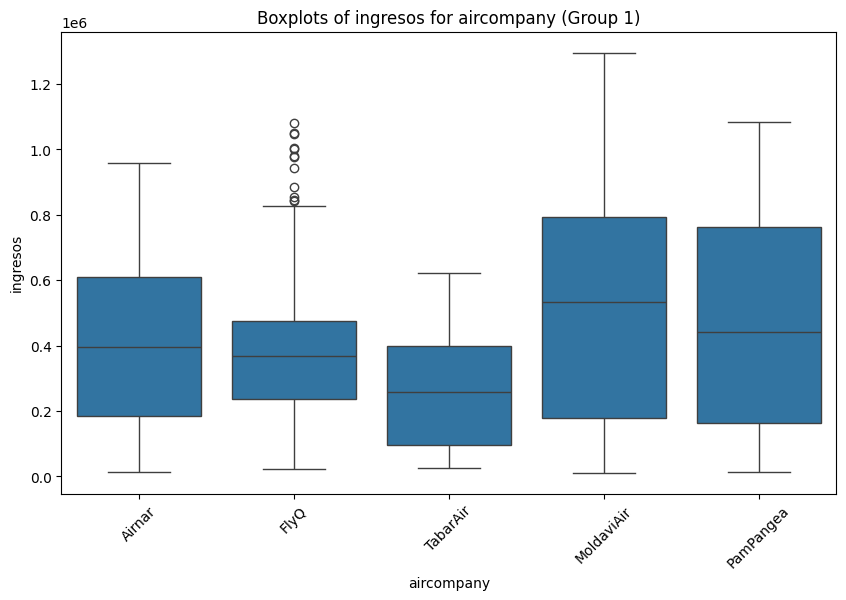

In [47]:
# Ingresos por compañía
plot_grouped_boxplots(df_air_jun,"aircompany","ingresos")

In [50]:
df_air_jun.groupby("aircompany")["ingresos"].describe()

,count,mean,std,min,25%,50%,75%,max
aircompany,,,,,,,,
Airnar,100.0,405293.978200,269583.848420,14232.65,185270.6000,396764.220,608356.1225,958617.02
FlyQ,108.0,401619.008056,295633.712828,23498.34,237556.9525,366970.685,473901.4325,1081702.91
MoldaviAir,133.0,548077.209098,374577.838426,11797.85,178872.9000,532426.220,794055.4100,1295515.83
PamPangea,117.0,478417.048718,364458.092328,12383.21,163124.5300,442668.520,763079.0200,1083591.01
TabarAir,142.0,271042.230282,177006.035877,24289.53,95620.5075,258379.745,398147.1925,623089.41


- Compañía con más vuelos pero con menos ingresos

### #2.2

Repite el análisis multivariante entre "ingresos","distancias" y "consumo_kg". ¿Qué veíamos que parecía también muy prometedor?

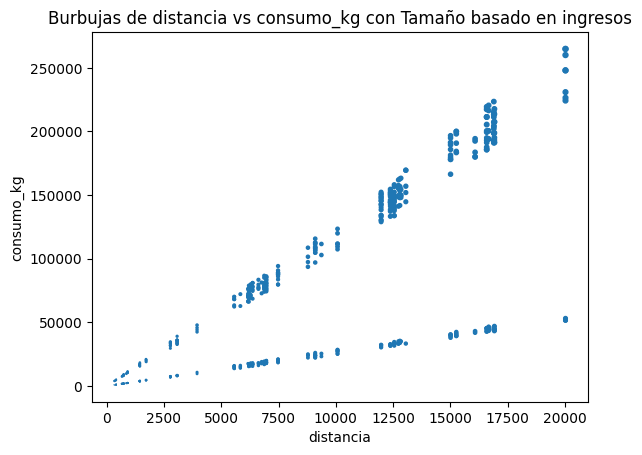

In [ ]:
- bubble_plot(df_air_jun,"distancia","consumo_kg","ingresos", scale = 100000)

- Hay una correlación entre distancia y consumo
- El tamaño de las burbujas depende de los ingresos y son similares, por lo que a ingresos similares hay una línea con menor consumo por distancia, por tanto más eficientes y rentables (igual ingresos, menos coste)


El siguente paso sería escoger una de las tres, hacerle un *binning* o convertirla a categórica y realizar el análisis multivariante entre numéricas con una categórica

### #2.3

Crea una variable categorica "cat_vuelo" a partir de distancias, escoge los rangos de las categorías basándote en la distribución de valores de "distancia" (sugerencia entre 3 y 4 categorías). Extra: Realiza ahora otra vez el análisis multivariante "cat_vuelo", "ingresos", "consumo_kg". ¿Ves algo diferente?

In [67]:
def plot_multiple_boxplots(df, columns, dim_matriz_visual = 2):
    num_cols = len(columns)
    num_rows = num_cols // dim_matriz_visual + num_cols % dim_matriz_visual
    fig, axes = plt.subplots(num_rows, dim_matriz_visual, figsize=(12, 6 * num_rows))
    axes = axes.flatten()

    for i, column in enumerate(columns):
        if df[column].dtype in ['int64', 'float64']:
            sns.boxplot(data=df, x=column, ax=axes[i])
            axes[i].set_title(column)

    # Ocultar ejes vacíos
    for j in range(i+1, num_rows * 2):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

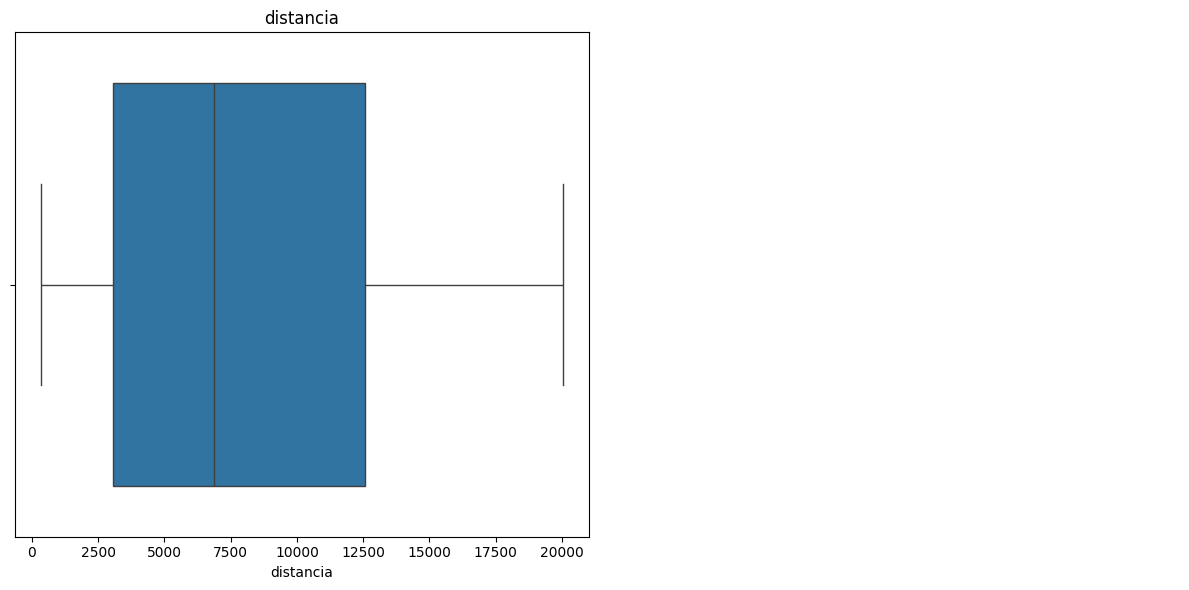

In [68]:
plot_multiple_boxplots(df_air_jun, ["distancia"])

* LD -> Larga Distancia distancia > 12500 Km
* MD -> Media Distacia distancia entres 7500 Km y 12500 Km
* OSD -> Distancia corta entres 2500 Km y 7500 Km
* SD -> Distancia corta -> distancias < 2500 Km

In [69]:
def clasificador_distancia(serie):
    clasificacion = []
    for distancia in serie:
        if distancia > 12500:
            clasificacion.append("LD")
        elif distancia >= 7500:
            clasificacion.append("MD")
        elif distancia > 2500:
            clasificacion.append("OCD")
        else:
            clasificacion.append("CD")
    return clasificacion

In [70]:
df_air_jun["cat_vuelo"] = clasificador_distancia(df_air_jun["distancia"])

In [72]:
col_directora = "cat_vuelo"
var_1 = "ingresos"
var_2 = "consumo_kg"
diccionario_multivariante = {}
for valor in df_air_jun[col_directora].unique():
    diccionario_multivariante[valor] = df_air_jun.loc[df_air_jun[col_directora] == valor,[var_2,var_1]] # Ojo al orden quiero ver para cada oferta como es la distribución de educacion

Respuesta CD:


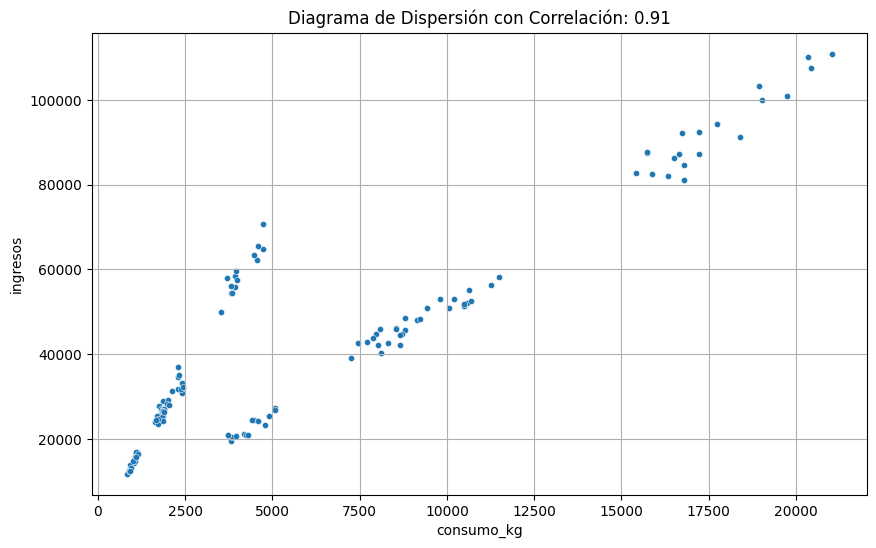

Respuesta LD:


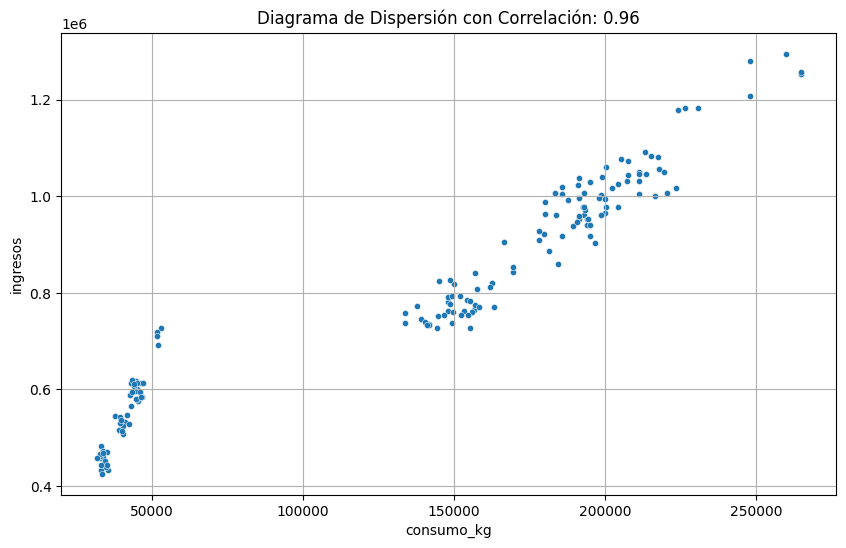

Respuesta MD:


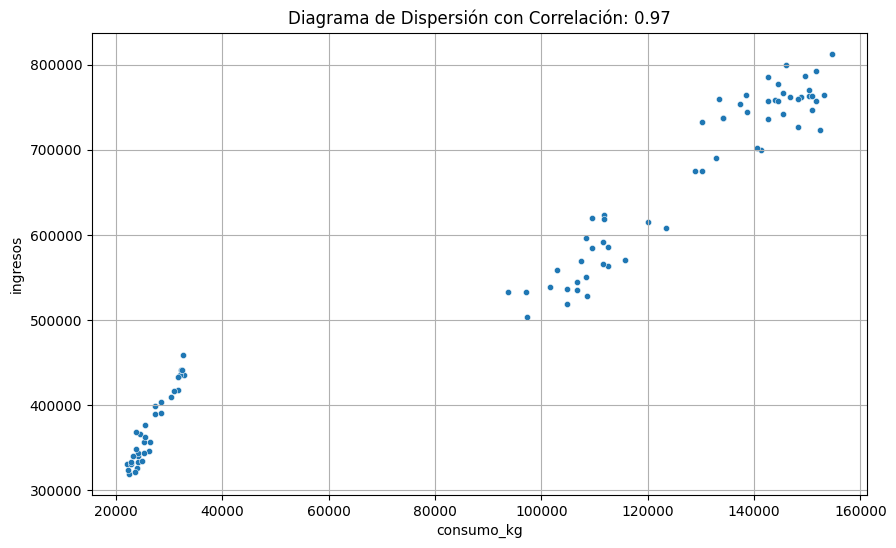

Respuesta OCD:


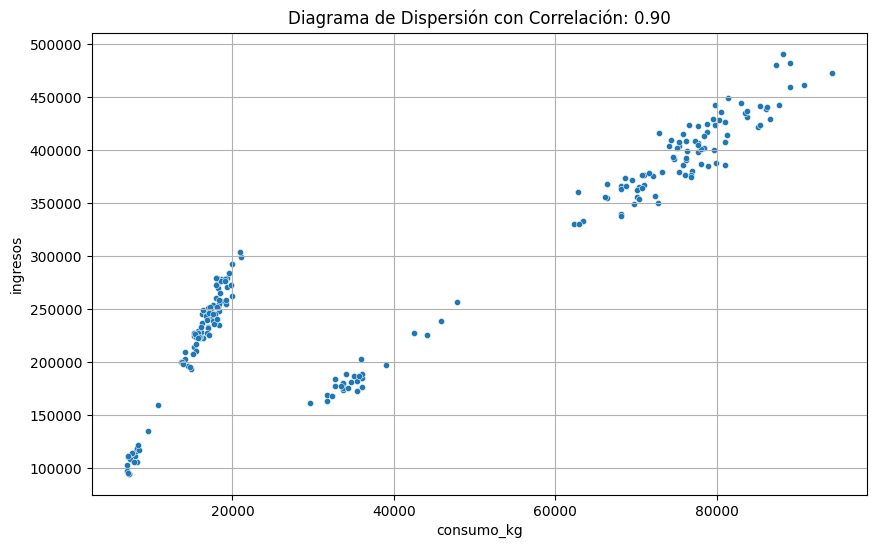

In [73]:
for valor,df_datos in diccionario_multivariante.items():
    print(f"Respuesta {valor}:")
    grafico_dispersion_con_correlacion(df_datos,var_2,var_1, tamano_puntos=20, mostrar_correlacion= True)

### Extra:

#1 Consejos para encontrar "objetivos":

Si partes de un dataset que te parece interesante pero sin pregruntras claras, haz como hicimos con el dataset de Aviones. Describe, prioriza a ojo tus variables, realiza un análisis univariante completo, realiza un análisis bivariante ente las parejas de variables que te parecieron más intereantes. Llegados a este punto si el dataset tiene riqueza informativa, algo diferente tiene que haber aparecido (otra cosa es que sea interesante para ti :-)).  

Fíjate en lo que encontramos en el dataset de viajes: la empresa de más vuelos es la que menos ingresos tiene o la existencia clara de una línea de vuelos más eficientes en consumo que otros y otra de mayor ingresos por consumo. Lo siguiente es explorar esos puntos normalmente intentando contestar a: ¿por qué pasa?¿dónde,cuándo o cómo pasa?  

Busca esas "notas discordantes" en tu dataset, ya de por sí son mensajes del análisis. Ordénalas por importancia (importancia = impactan en ingresos, impactan en la calidad de la vida de las personas, impactan en el coste y poco más hay) e intenta entender por qué suceden esas notas discordantes, cómo solucionarlas o aprovecharlas y ya tienes objeetivos para el EDA; incluso si no encuentras respuesta siempre tendras esas notas discordantes, la conclusión de que no se puede avanzar con los datos que se tienen y los próximos pasos de encontrar más información para explicar lo que ocurre.

#2 Contestando a las preguntas de "Viajes".

- Necesitamos identificar esas líneas eficientes, para ello crea una variable que mida el ingreso por kilogramo consumido y otra que mida el kilogramo consumido por kilómetro. Haz el análisis univariante de las mismas intentando encontrar una diferencia clara entre viajes eficientes y no eficientes (que sabemos que existe). Fija un umbral para indicar si un viaje es supereficiente o si no lo es

In [78]:
var_1 = df_air_jun["ingresos"]/df_air_jun["consumo_kg"] #variable que mide el ingreso por kg consumido
var_2 = df_air_jun["consumo_kg"]/df_air_jun["distancia"] #variable que mide el kg consumido por kilómetro

df_air_jun["rentabilidad"] = var_1
df_air_jun["coste"] = var_2

df_air_jun[["rentabilidad","coste"]].describe()


,rentabilidad,coste
count,600.000000,600.000000
mean,8.904848,7.934756
std,4.407691,4.537013
min,4.554666,2.430000
25%,5.131672,2.660600
50%,5.459427,11.086400
75%,13.855693,11.906800
max,16.213469,13.224640


array([[<Axes: title={'center': 'rentabilidad'}>,
        <Axes: title={'center': 'coste'}>]], dtype=object)

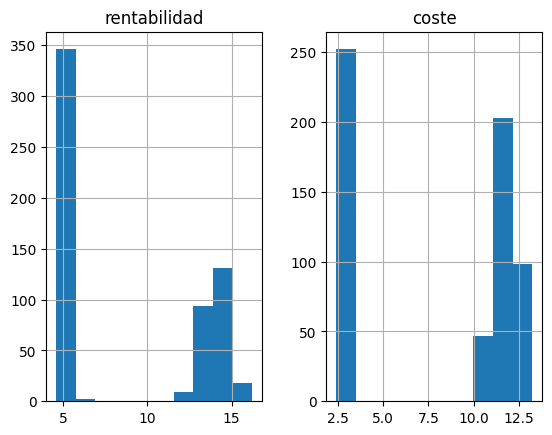

In [79]:
df_air_jun[["rentabilidad","coste"]].hist()

umbral: rentabilidad (USD ingresados/kg) > 13 & coste (kg combustible/km) <3

- Crea esa variable de eficiencia binaria de eficiencia.


In [84]:
eficiencia =  (df_air_jun["rentabilidad"] > 13) & (df_air_jun["coste"] < 3)

df_air_jun["eficiencia"] = eficiencia

df_air_jun

,aircompany,origen,destino,distancia,avion,con_escala,consumo_kg,duracion,ingresos,id_vuelo,mes,cat_vuelo,rentabilidad,coste,eficiencia
0,Airnar,París,Ginebra,411,Boeing 737,False,1028.691900,51,14232.65,Air_PaGi_10737,Jun23,CD,13.835678,2.502900,True
1,FlyQ,Bali,Roma,12738,Boeing 737,True,33479.132544,1167,468527.19,Fly_BaRo_10737,Jun23,LD,13.994604,2.628288,True
2,TabarAir,Ginebra,Los Angeles,9103,Airbus A380,False,109439.907200,626,584789.19,Tab_GiLo_11380,Jun23,MD,5.343473,12.022400,False
3,MoldaviAir,París,Cincinnati,6370,Boeing 737,False,17027.010000,503,233342.51,Mol_PaCi_10737,Jun23,OCD,13.704256,2.673000,True
4,TabarAir,Cincinnati,Roma,7480,Boeing 747,False,86115.744000,518,438535.07,Tab_CiRo_10747,Jun23,OCD,5.092391,11.512800,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,PamPangea,Bali,Londres,12553,Boeing 737,True,33310.138680,1153,442668.52,Pam_BaLo_10737,Jun23,LD,13.289303,2.653560,True
596,Airnar,Cádiz,París,1447,Airbus A380,False,17229.139600,116,87307.63,Air_CaPa_11380,Jun23,CD,5.067440,11.906800,False
597,Airnar,Los Angeles,Cádiz,9373,Boeing 737,False,23231.917800,731,339943.47,Air_LoCa_10737,Jun23,MD,14.632605,2.478600,True
598,FlyQ,Barcelona,Bali,13058,Boeing 747,True,144766.211200,1070,752212.98,Fly_BaBa_10747,Jun23,LD,5.196054,11.086400,False


- Ahora haz el análisis bivariante de esa eficiencia y las compañías aéreas (queremos ver si realmente eso explica la situación de TabarAir). 


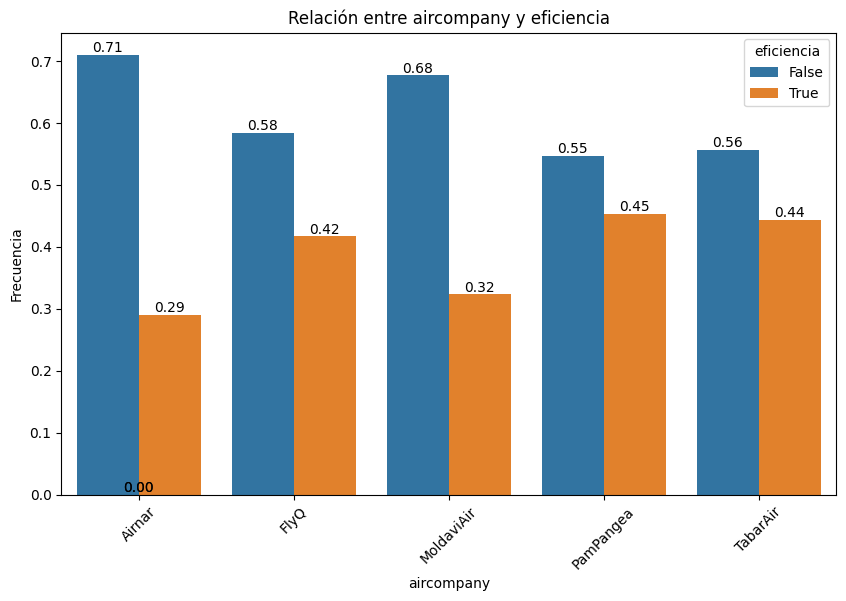

In [86]:
plot_categorical_relationship_fin(df_air_jun, "aircompany","eficiencia", relative_freq = True, show_values= True)

- Para nota: Hacer los análisis multivariante por compañía, eficiencia, tipo de avión y compañía, eficiencia, destino e incluso el de compañía, eficiencia, origen, destino.


Respuesta True:


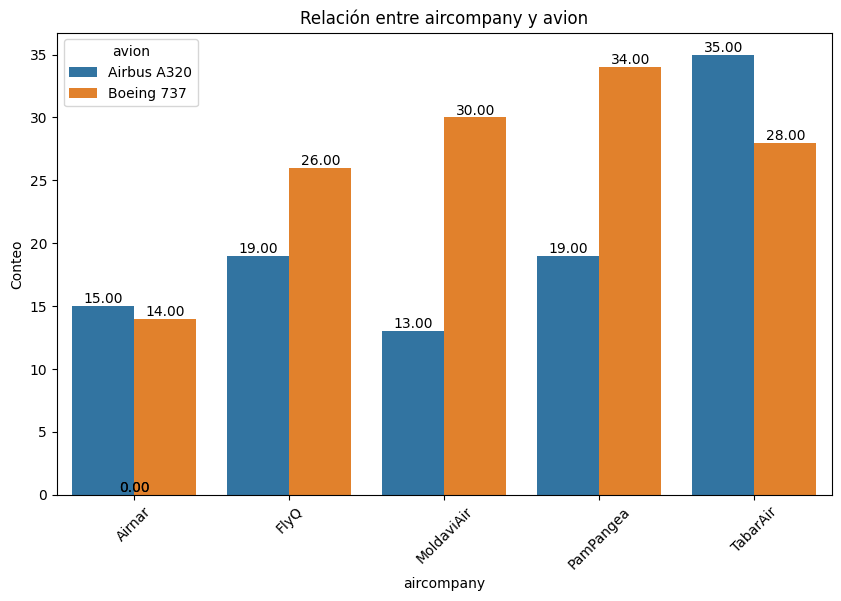

Respuesta False:


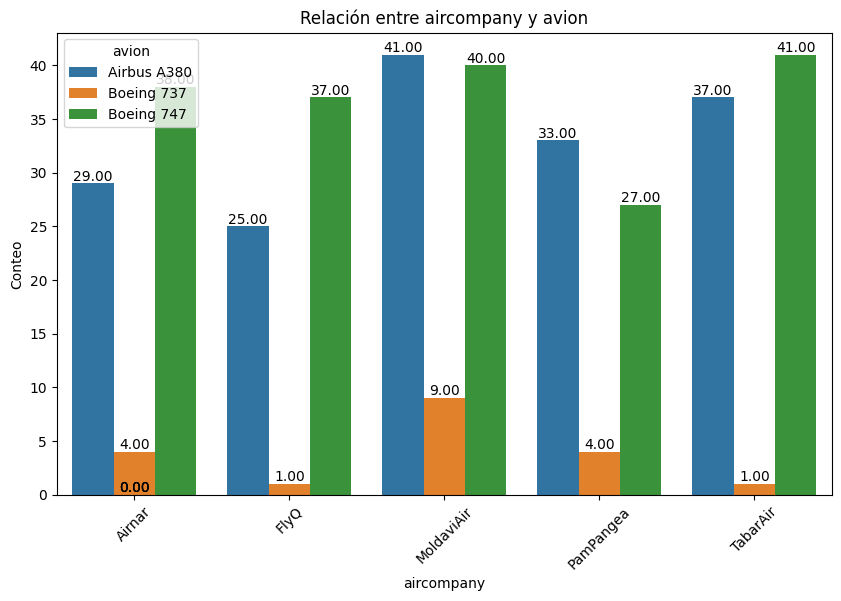

In [ ]:
# Compañías, tipo de avión y eficiencia

col_directora = "eficiencia"
var_1 = "aircompany"
var_2 = "avion"

diccionario_multivariante = {}
for valor in df_air_jun[col_directora].unique():
    diccionario_multivariante[valor] = df_air_jun.loc[df_air_jun[col_directora] == valor,[var_1,var_2]] 

for valor,df_datos in diccionario_multivariante.items():
    print(f"Respuesta {valor}:")
    plot_categorical_relationship_fin(df_datos,var_1,var_2, show_values= True)

Respuesta True:


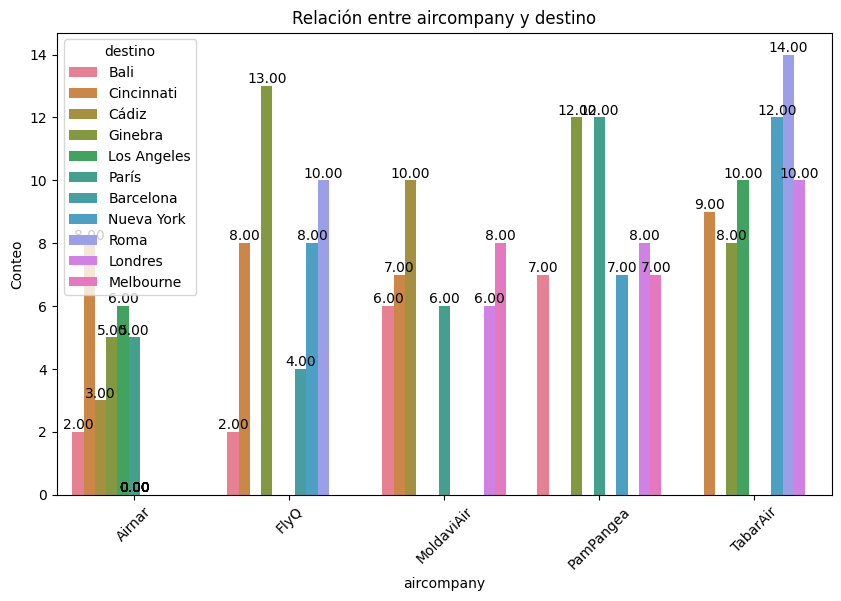

Respuesta False:


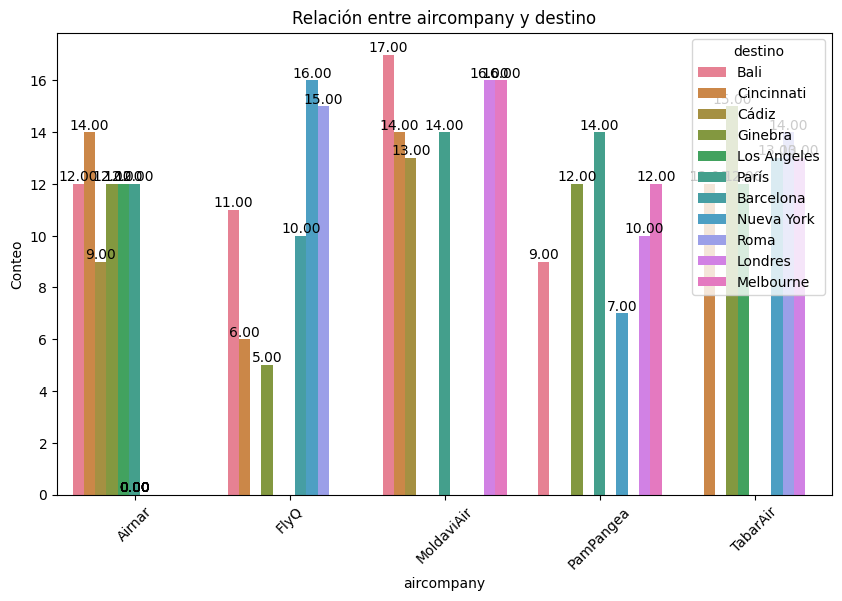

In [92]:
# Compañías, destino y eficiencia

col_directora = "eficiencia"
var_1 = "aircompany"
var_2 = "destino"

diccionario_multivariante = {}
for valor in df_air_jun[col_directora].unique():
    diccionario_multivariante[valor] = df_air_jun.loc[df_air_jun[col_directora] == valor,[var_1,var_2]] 

for valor,df_datos in diccionario_multivariante.items():
    print(f"Respuesta {valor}:")
    plot_categorical_relationship_fin(df_datos,var_1,var_2, show_values= True)

- Con todo ello deberías poder encontrar si hay respuesta a la situación de TabarAir además de poder mostrar otros datos interesantes.
